# Aviation Accident Exploratory Notebook

## Overview 

This project analyzes data from decades of aviation accidents to recommend the best aircrafts for a business to invest in.

In [1]:
# import python packages for analyis, computation and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in the data with pd.read_csv
Aviation_data = pd.read_csv('archive/AviationData.csv', low_memory=False, encoding='latin-1')
USState_Codes = pd.read_csv('archive/USState_Codes.csv', low_memory=False, encoding='latin-1')

## Aviation and US State Codes Data

The data includes information from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. This information will be useful for finding the best aircraft models to invest in based on previous accidents. 

In [3]:
# display information on the aviation dataframe
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Basic summary of statistics for numerical columns
Aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


There seems to be outliers that are driving the maximums to shoot way above the average. Although due to the large number of records, it could be a skewed distribution but we shall see in the analysis.

In [5]:
# display information on the US State Codes dataframe
USState_Codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [6]:
USState_Codes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


The avaiation dataframe includes 31 columns and close to 90,000 entries. For each incident it covers 31 categories, including but not limited to the investigation type, make and model of the plane, weather and location data, information about the flight, damage to the plane and injuries to passengers, the regulation data and more.
There is a lot of missing data which we will sift through in data preparation in order to reach the best conclusions. In the US State Codes dataframe there are two columns, one with the state names and their corresponding code in the neighboring cell. There is no missing data and there are only object data types. This information will be prepared, cleaned, and analyzed to create visualizations which will subsequently aid in the final recommendations.

## Data Preparation

In this section we will prepare the data by making decisions on which data to use and which data to remove or replace. 

In [120]:
# Drop columns we're not using
Aviation_columns = Aviation_data.drop(['FAR.Description','Schedule', 'Purpose.of.flight', 'Registration.Number', 
                                         'Publication.Date', 'Airport.Code', 'Airport.Name', 'Amateur.Built', 'Latitude', 'Longitude', 'Accident.Number', 'Engine.Type', 'Broad.phase.of.flight'], axis = 1)

In [121]:
# Display number of nulls in each column
Aviation_columns.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6381
dtype: int64

In [122]:
# Location column values
Aviation_columns['Location'].value_counts()

ANCHORAGE, AK             434
MIAMI, FL                 200
ALBUQUERQUE, NM           196
HOUSTON, TX               193
CHICAGO, IL               184
                         ... 
VAN HORNSVILLE, NY          1
DELOIT, IA                  1
AVA, NY                     1
Morona Santiago, Spain      1
GEROME, AR                  1
Name: Location, Length: 27758, dtype: int64

In [123]:
# Country column values 
Aviation_columns['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Obyan                 1
Niger                 1
Mauritania            1
Benin                 1
Chad                  1
Name: Country, Length: 219, dtype: int64

In [124]:
# Only keeping USA country
Aviation_columns = Aviation_columns[Aviation_columns['Country'] == 'United States']

In [125]:
USState_Codes_dict = USState_Codes.set_index('US_State')['Abbreviation'].to_dict()

In [126]:
USState_Codes_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY',
 'American Samoa': 'AS',
 'G

In [127]:
Aviation_columns['Location'].values[1][-2:]

'CA'

In [128]:
# Replace missing values with an empty string
Aviation_columns['Location'].fillna('', inplace=True)

# Only keep state abbreviation in location
for index in range(len(Aviation_columns['Location'])):
    Aviation_columns['Location'].values[index] = Aviation_columns['Location'].values[index][-2:]

In [129]:
Aviation_columns['Location'].value_counts().index

Index(['CA', 'TX', 'FL', 'AK', 'AZ', 'CO', 'WA', 'IL', 'MI', 'GA', 'NY', 'OH',
       'PA', 'OR', 'NC', 'MO', 'WI', 'AR', 'MN', 'ID', 'NM', 'UT', 'IN', 'VA',
       'OK', 'NV', 'LA', 'NJ', 'AL', 'TN', 'KS', 'MT', 'SC', 'MA', 'IA', 'MD',
       'MS', 'WY', 'NE', 'KY', 'ND', 'ME', 'CT', 'HI', 'SD', 'WV', 'NH', 'VT',
       'RI', 'PR', 'DE', 'GM', 'DC', 'OF', 'AO', 'n,', 'PO', '', 'o,', 'GU',
       'VI', 'A,', 'g,', ',', 'UN', 'x,', 'e,', '9,', 'a,', 'd,', 'm,', 'i,',
       'H,', 's,', 'C,', '8,', 'O,', 'CB', '7,', 'y,', 'l,'],
      dtype='object')

In [130]:
Aviation_columns['Location'].value_counts()

CA    8857
TX    5913
FL    5825
AK    5672
AZ    2834
      ... 
O,       1
CB       1
7,       1
y,       1
l,       1
Name: Location, Length: 81, dtype: int64

In [131]:
Aviation_columns['Country'].value_counts()

United States    82248
Name: Country, dtype: int64

In [132]:
# Aircraft category values
Aviation_data['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [133]:
# Dropping aircrafts that arent airplanes because we only want airplanes
Aviation_columns = Aviation_columns[Aviation_columns['Aircraft.Category'] == 'Airplane']

In [134]:
Aviation_columns['Aircraft.Category'].value_counts()

Airplane    24229
Name: Aircraft.Category, dtype: int64

In [135]:
# drop nulls in Model and Model column
Aviation_columns = Aviation_columns.dropna(subset = ['Model', 'Make'])

In [136]:
Aviation_columns['Make'].value_counts()

CESSNA              4264
Cessna              3460
PIPER               2496
Piper               1840
BEECH                890
                    ... 
Ronald D. Murray       1
Eaa Biplane            1
Jonsson                1
BAREISS DAVID A        1
Crisman                1
Name: Make, Length: 3702, dtype: int64

In [137]:
Aviation_columns['Make'].isna().sum()

0

In [138]:
Aviation_columns['Model'].value_counts()

172           772
152           427
172N          305
182           289
172S          273
             ... 
ZENAIR 701      1
Vans RV-7       1
SA-227-AT       1
180 - B         1
L16A            1
Name: Model, Length: 4788, dtype: int64

In [139]:
Aviation_columns['Model'].isna().sum()

0

In [140]:
#injury severity column values
Aviation_columns['Injury.Severity'].value_counts()

Non-Fatal     19848
Fatal          3028
Fatal(1)        357
Fatal(2)        242
Incident        165
Minor           157
Serious         114
Fatal(3)         80
Fatal(4)         63
Fatal(5)         23
Fatal(6)         15
Fatal(7)          9
Fatal(8)          7
Fatal(10)         4
Fatal(12)         3
Fatal(17)         1
Fatal(27)         1
Fatal(11)         1
Fatal(14)         1
Fatal(228)        1
Fatal(13)         1
Fatal(16)         1
Fatal(9)          1
Fatal(65)         1
Name: Injury.Severity, dtype: int64

In [141]:
Aviation_columns['Injury.Severity'].isna().sum()

81

In [142]:
# fill nans with non fatal
Aviation_columns['Injury.Severity'] = Aviation_columns['Injury.Severity'].fillna('Non-Fatal')

In [143]:
Aviation_columns['Injury.Severity'].isna().sum()

0

In [144]:
# combine all fatal values replace nans with fatal 
Aviation_columns.loc[Aviation_columns['Injury.Severity'].str.contains('Fatal\('), 'Injury.Severity'] = 'Fatal'

In [145]:
Aviation_columns['Injury.Severity'].value_counts()

Non-Fatal    19929
Fatal         3840
Incident       165
Minor          157
Serious        114
Name: Injury.Severity, dtype: int64

In [146]:
Aviation_columns['Total.Fatal.Injuries'].value_counts()

0.0      17420
1.0       2077
2.0       1118
3.0        299
4.0        191
5.0         60
6.0         33
7.0         15
8.0         10
10.0         8
9.0          4
12.0         3
11.0         2
14.0         2
16.0         1
17.0         1
49.0         1
27.0         1
228.0        1
13.0         1
65.0         1
Name: Total.Fatal.Injuries, dtype: int64

In [147]:
Aviation_columns['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal', 'Incident', 'Minor', 'Serious'], dtype=object)

In [148]:
Aviation_columns['Aircraft.damage'].value_counts()

Substantial    20508
Destroyed       2666
Minor            507
Unknown           43
Name: Aircraft.damage, dtype: int64

In [149]:
Aviation_columns['Aircraft.damage'].isna().sum()

481

In [150]:
# replace aircraft damage nans with unknown
Aviation_columns['Aircraft.damage'] = Aviation_columns['Aircraft.damage'].fillna('Unknown')

In [151]:
Aviation_columns.describe() # see summary statistics for numerical columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,23583.000000,21249.000000,21270.000000,21613.000000,23493.000000
mean,1.132723,0.342322,0.278608,0.220423,4.306176
std,0.367482,1.892637,1.633074,0.822648,24.239808
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,228.000000,137.000000,50.000000,588.000000


In [152]:
# fill number of engines with mean
Aviation_columns['Number.of.Engines'] = Aviation_columns['Number.of.Engines'].fillna(Aviation_columns['Number.of.Engines'].mean())

In [153]:
# fill injured columns with 0

Aviation_columns[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']] = Aviation_columns[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].fillna(0)

In [154]:
Aviation_columns.describe() # see summary statistics for numerical columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,24205.000000,24205.000000,24205.000000,24205.000000,24205.000000
mean,1.132723,0.300516,0.244825,0.196819,4.179508
std,0.362729,1.776842,1.533561,0.780335,23.891703
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,228.000000,137.000000,50.000000,588.000000


In [155]:
# weather condition values and counts
Aviation_columns['Weather.Condition'].value_counts()

VMC    22296
IMC     1294
Unk      111
UNK       58
Name: Weather.Condition, dtype: int64

In [156]:
# combine unknown columns in weather condition
Aviation_columns['Weather.Condition'] = Aviation_columns['Weather.Condition'].replace({'Unk' : 'UNK'})

In [157]:
Aviation_columns['Weather.Condition'].isna().sum()

446

In [158]:
Aviation_columns['Weather.Condition'].value_counts()

VMC    22296
IMC     1294
UNK      169
Name: Weather.Condition, dtype: int64

In [159]:
# filled weather condition nans with unknown
Aviation_columns['Weather.Condition'] = Aviation_columns['Weather.Condition'].fillna('UNK')

In [160]:
Aviation_columns['Weather.Condition'].isna().sum()

0

In [161]:
Aviation_columns['Report.Status'].isna().sum()

2176

In [162]:
Aviation_columns['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                                                                 6364
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                                                                                                     56
A loss of engine power for undetermined reasons.                                                                                                                                                                                                                                                                                

In [163]:
Aviation_columns = Aviation_columns.dropna(subset = ['Report.Status'])

In [164]:
Aviation_columns = Aviation_columns[Aviation_columns['Report.Status'] != 'Foreign']

In [165]:
Aviation_columns = Aviation_columns[Aviation_columns['Report.Status'] != 'Probable Cause']

In [166]:
Aviation_columns['Report.Status'].value_counts()

The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                   56
A loss of engine power for undetermined reasons.                                                                                                                                                                                                               49
The pilot's failure to maintain directional control during landing.                                                                                                                                                                                            43
A total loss of engine power for undetermined reasons.                                                                                                                                                                            

In [167]:
Aviation_columns['Event.Date'].value_counts()

2012-08-31    15
2011-03-19    14
2011-06-18    14
2010-05-29    14
2011-07-23    14
              ..
2021-08-30     1
2020-08-04     1
2009-01-13     1
2014-12-03     1
2020-05-24     1
Name: Event.Date, Length: 4720, dtype: int64

In [168]:
Aviation_columns['Event.Date'] = Aviation_columns['Event.Date'].map(lambda x: x[:4])

In [169]:
Aviation_columns['Event.Date'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [170]:
Aviation_columns.isna().sum()

Event.Id                     0
Investigation.Type           0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Number.of.Engines            0
Air.carrier               7131
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Report.Status                0
dtype: int64

In [171]:
# need to clean up make column
Aviation_columns['Make'] = Aviation_columns['Make'].map(lambda x: x.lower())

In [172]:
Aviation_columns['Make'].value_counts()

cessna                    4638
piper                     2691
beech                      935
boeing                     291
mooney                     238
                          ... 
bailey                       1
buhlmann howard              1
mckay gene                   1
flightstar sportplanes       1
wilderoder                   1
Name: Make, Length: 2690, dtype: int64

In [173]:
Aviation_columns['Make'] = Aviation_columns['Make'].map(lambda x: x.title())

In [174]:
#going to filter data by top_ten_makes to make visualizations more comprehensive

In [175]:
# filters by top ten makes 
top_ten_makes = Aviation_columns.Make.value_counts().nlargest(10)
topten_df = Aviation_columns[Aviation_columns.Make.isin(top_ten_makes.index)]

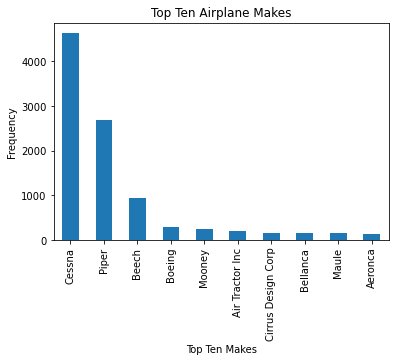

In [176]:
# plot top ten to show - might use this in analysis
fig, ax = plt.subplots()
top_ten_makes.plot.bar()

ax.set_title('Top Ten Airplane Makes')
ax.set_xlabel('Top Ten Makes')
ax.set_ylabel('Frequency');

In [177]:
topten_df.to_csv('topten_df.csv', sep=',')

In [178]:
# clean dataframe is called topten_df
topten_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9607 entries, 63915 to 88661
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                9607 non-null   object 
 1   Investigation.Type      9607 non-null   object 
 2   Event.Date              9607 non-null   object 
 3   Location                9607 non-null   object 
 4   Country                 9607 non-null   object 
 5   Injury.Severity         9607 non-null   object 
 6   Aircraft.damage         9607 non-null   object 
 7   Aircraft.Category       9607 non-null   object 
 8   Make                    9607 non-null   object 
 9   Model                   9607 non-null   object 
 10  Number.of.Engines       9607 non-null   float64
 11  Air.carrier             5400 non-null   object 
 12  Total.Fatal.Injuries    9607 non-null   float64
 13  Total.Serious.Injuries  9607 non-null   float64
 14  Total.Minor.Injuries    9607 non-nu

# Summary

topten_df 